# **kaggle**

### Introduction

In [ ]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

print(tf.__version__)

2.9.2


### Load Data and Preprocessing

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


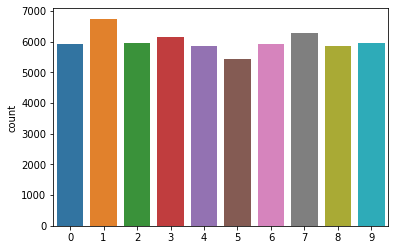

In [ ]:
sns.countplot(y_train)

In [ ]:
# check for Nan values
print(np.isnan(x_train).any())
print(np.isnan(x_test).any())

False
False


In [ ]:
# Normalization and Reshapping
input_shape = (28, 28, 1)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

x_test = x_test/255.0

In [ ]:
# Label Encoding
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], shape=(10,), dtype=float32)


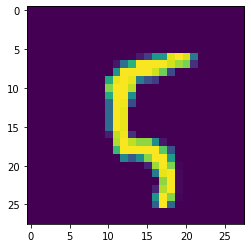

In [ ]:
# Visualize data
plt.imshow(x_train[100][:,:,0])
print(y_train[100])

### Modeling

In [ ]:
# hyperparams
batch_size = 64
num_classes = 10
epochs = 5

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=input_shape),
    
    tf.keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
# callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc') > 0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
# fitting
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    callbacks=[callbacks])

Epoch 1/5
470/844 [===============>..............] - ETA: 3:55 - loss: 0.6026 - acc: 0.8579

KeyboardInterrupt: ignored

### Evaluate the Model

In [ ]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(history.history['loss'], color='b', label='Training Loss')
ax[0].plot(history.history['val_loss'], color='r', label='Validation Loss', axes=ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label='Training Accuracy')
ax[1].plot(history.history['val_acc'], color='r', label='Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
# Result
test_loss, test_acc = model.evaluate(x_test, y_test)

In [ ]:
# Confusion Matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_test, axis=1)

y_true = np.argmax(y_test, axis=1)
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')

----

# **Everyone deep learning**

0. Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os

1. Set Hyper Parameters

In [ ]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

cur_dir = os.getcwd()
ckpt_dir_name = "checkpoints"
model_dir_name = "minst_cnn_seq"

checkpoint_dir = os.path.join(cur_dir, ckpt_dir_name, model_dir_name)
os.makedirs(checkpoint_dir, exist_ok=True)

checkpoint_prefix = os.path.join(checkpoint_dir, model_dir_name)

2. Make a Data Pipelining

In [ ]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.astype(np.float32)/255.
test_images = test_images.astype(np.float32)/255.
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

train_dataset = tf.data.Dataset.from_tensor_slices(((train_images, train_labels))).shuffle(buffer_size=100000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices(((test_images, test_labels))).shuffle(buffer_size=100000).batch(batch_size)

3. Build a Neural Network Model Sequencial API

In [ ]:
def create_model():
  model = keras.Sequential()
  model.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation=tf.nn.relu, padding="SAME", input_shape=(28, 28, 1)))
  model.add(keras.layers.MaxPool2D(padding='SAME'))
  model.add(keras.layers.Conv2D(filters=64, kernel_size=3, activation=tf.nn.relu, padding="SAME"))
  model.add(keras.layers.MaxPool2D(padding='SAME'))
  model.add(keras.layers.Conv2D(filters=128, kernel_size=3, activation=tf.nn.relu, padding="SAME"))
  model.add(keras.layers.MaxPool2D(padding="SAME"))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(256, activation=tf.nn.relu))
  model.add(keras.layers.Dropout(0.4))
  model.add(keras.layers.Dense(10))
  return model

model = create_model()
model.summary()
tf.keras.utils.plot_model(model)

4. Define a Loss Function

In [ ]:
def loss_fn(model, images, labels):
  logits = model(images, training=True)
  loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
  return loss

5. Calculate a Gradient

In [ ]:
def grad(model, images, labels):
  with tf.GradientTape() as tape:
    loss = loss_fn(model, images, labels)
  return tape.gradient(loss, model.variables)

6. Select an Optimizer
7. Define a Metric for Model's Performance
8. Make a Checkpoint for saving

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)

def evaluate(model, images, labels):
  logits = model(images, training=False)
  correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  return accuracy

checkpoint = tf.train.Checkpoint(cnn=model)

9. Train and Validate a Neural Network Model

In [ ]:
for epoch in range(training_epochs):
  avg_loss = 0.
  avg_train_acc = 0.
  avg_test_acc = 0.
  train_step = 0
  test_step = 0

  for images, labels in train_dataset:
    grads = grad(model, images, labels)
    optimizer.apply_gradients(zip(grads, model.variables))
    loss = loss_fn(model, images, labels)
    acc = evaluate(model, images, labels)
    avg_loss = avg_loss + loss
    avg_train_acc = avg_train_acc + acc
    train_step += 1
  
  avg_loss = avg_loss / train_step
  avg_train_acc = avg_train_acc / train_step

  for images, labels in test_dataset:
    acc = evaluate(model, images, labels)
    avg_test_acc = avg_test_acc + acc
    test_step += 1
  avg_test_acc = avg_test_acc / test_step
  
  print("Epoch:", f'{epoch+1}', 'loss = ', '{:.8f}'.format(avg_loss),
        "train accuracy = ", '{:.4f}'.format(avg_train_acc),
        "test accuracy = ", '{:.4f}'.format(avg_test_acc))
  
  checkpoint.save(file_prefix=checkpoint_prefix)

Epoch: 1 loss =  0.07485867 train accuracy =  0.9835 test accuracy =  0.9877
Epoch: 2 loss =  0.04122783 train accuracy =  0.9909 test accuracy =  0.9893
Epoch: 3 loss =  0.02977159 train accuracy =  0.9940 test accuracy =  0.9888
Epoch: 4 loss =  0.02385105 train accuracy =  0.9955 test accuracy =  0.9915
Epoch: 5 loss =  0.01858001 train accuracy =  0.9964 test accuracy =  0.9924
Epoch: 6 loss =  0.01528452 train accuracy =  0.9973 test accuracy =  0.9928
Epoch: 7 loss =  0.01169398 train accuracy =  0.9980 test accuracy =  0.9916
Epoch: 8 loss =  0.01092089 train accuracy =  0.9982 test accuracy =  0.9912
Epoch: 9 loss =  0.01003911 train accuracy =  0.9987 test accuracy =  0.9918
Epoch: 10 loss =  0.00705197 train accuracy =  0.9991 test accuracy =  0.9911
Epoch: 11 loss =  0.00715015 train accuracy =  0.9990 test accuracy =  0.9930
Epoch: 12 loss =  0.00648589 train accuracy =  0.9992 test accuracy =  0.9936
Epoch: 13 loss =  0.00613614 train accuracy =  0.9992 test accuracy =  0.

---

# **Everyone deep learning (Subclassing & Ensemble)**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os
# data agmentation
from scipy import ndimage

In [ ]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

cur_dir = os.getcwd()
ckpt_dir_name = "checkpoints"
model_dir_name = "minst_cnn_seq"

checkpoint_dir = os.path.join(cur_dir, ckpt_dir_name, model_dir_name)
os.makedirs(checkpoint_dir, exist_ok=True)

checkpoint_prefix = os.path.join(checkpoint_dir, model_dir_name)

2. Data Augmentation

In [ ]:
def data_augmentation(images, labels):
  aug_images = []; aug_labels = []

  for x, y in zip(images, labels):
    aug_images.append(x)
    aug_labels.append(y)

    bg_value = np.median(x)
    for _ in range(4):
      angle = np.random.randint(-15, 15, 1)
      rot_img = ndimage.rotate(x, angle, reshape=False, cval=bg_value)

      shift = np.random.randint(-2, 2, 2)
      shift_img = ndimage.shift(rot_img, shift, cval=bg_value)

      aug_images.append(shift_img)
      aug_labels.append(y)

    aug_images = np.array(aug_images)
    aug_labels = np.array(aug_labels)
    return aug_images, aug_labels

In [ ]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# data augmentation
# train_images, train_labels = data_augmentation(train_images, train_labels)

train_images = train_images.astype(np.float32)/255.
test_images = test_images.astype(np.float32)/255.
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

train_dataset = tf.data.Dataset.from_tensor_slices(((train_images, train_labels))).shuffle(buffer_size=500000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices(((test_images, test_labels))).batch(batch_size)

11490434/11490434 [==============================] - 1s 0us/step


3. Build a Neural Network Model

In [ ]:
class ConvBNRelu(tf.keras.Model):
  def __init__(self, filters, kernel_size=3, strides=1, padding='SAME'):
    super(ConvBNRelu, self).__init__()
    self.conv = keras.layers.Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding=padding, kernel_initializer='glorot_normal')
    self.batchnorm = tf.keras.layers.BatchNormalization()

  def call(self, inputs, training=False):
    layer = self.conv(inputs)
    layer = self.batchnorm(layer)
    layer = tf.nn.relu(layer)
    return layer

class DenseBNRelu(tf.keras.Model):
  def __init__(self, units):
    super(DenseBNRelu, self).__init__()
    self.dense = keras.layers.Dense(units=units, kernel_initializer='glorot_normal')
    self.batchnorm = tf.keras.layers.BatchNormalization()

  def call(self, inputs, training=False):
    layer = self.dense(inputs)
    layer = self.batchnorm(layer)
    layer = tf.nn.relu(layer)
    return layer

class MNISTModel(tf.keras.Model):
  def __init__(self):
    super(MNISTModel, self).__init__()
    self.conv1 = ConvBNRelu(filters=32, kernel_size=3, padding='SAME')
    self.pool1 = tf.keras.layers.MaxPool2D(padding='SAME')
    self.conv2 = ConvBNRelu(filters=64, kernel_size=3, padding='SAME')
    self.pool2 = tf.keras.layers.MaxPool2D(padding='SAME')
    self.conv3 = ConvBNRelu(filters=128, kernel_size=3, padding='SAME')
    self.pool3 = tf.keras.layers.MaxPool2D(padding='SAME')
    self.pool3_flat = tf.keras.layers.Flatten()
    self.dense4 = DenseBNRelu(units=256)
    self.drop4 = tf.keras.layers.Dropout(rate=0.4)
    self.dense5 = tf.keras.layers.Dense(units=10, kernel_initializer='glorot_normal')

  def call(self, inputs, training=False):
    net = self.conv1(inputs)
    net = self.pool1(net)
    net = self.conv2(net)
    net = self.pool2(net)
    net = self.conv3(net)
    net = self.pool3(net)
    net = self.pool3_flat(net)
    net = self.dense4(net)
    net = self.drop4(net)
    net = self.dense5(net)
    return net

In [ ]:
def loss_fn(model, images, labels):
  logits = model(images, training=True)
  loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
  return loss

def grad(model, images, labels):
  with tf.GradientTape() as tape:
    loss = loss_fn(model, images, labels)
    return tape.gradient(loss, model.variables)

In [ ]:
# model 추가
models = []
num_models = 5
for m in range(num_models):
  models.append(MNISTModel())

global_step = tf.Variable(0, trainable=False)
lr_decay = tf.compat.v1.train.exponential_decay(learning_rate, global_step, train_images.shape[0]/batch_size*num_models*5, 0.5, staircase=True)
optimizer = tf.keras.optimizers.Adam(learning_rate = lr_decay)

In [ ]:
def evaluate(models, images, labels):
  perdictions = tf.zeros_like(labels)
  for model in models:
    logits = model(images, training=False)
    perdictions += logits
  correct_prediction = tf.equal(tf.argmax(perdictions, 1), tf.argmax(labels, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  return accuracy

In [ ]:
checkpoints = []
for m in range(num_models):
  checkpoints.append(tf.train.Checkpoint(cnn = models[m]))

In [ ]:
for epoch in range(training_epochs):
  avg_loss = 0.
  avg_train_acc = 0.
  avg_test_acc = 0.
  train_step = 0
  test_step = 0

  for images, labels in train_dataset:
    for model in models:
      grads = grad(model, images, labels)
      optimizer.apply_gradients(zip(grads, model.variables))
      loss = loss_fn(model, images, labels)
      avg_loss += loss / num_models
    acc = evaluate(models, images, labels)
    avg_train_acc += acc
    train_step += 1
  
  avg_loss = avg_loss / train_step
  avg_train_acc = avg_train_acc / train_step


  for images, labels in test_dataset:
    acc = evaluate(model, images, labels)
    avg_test_acc = avg_test_acc + acc
    test_step += 1
  avg_test_acc = avg_test_acc / test_step
  
  print("Epoch:", f'{epoch+1}', 'loss = ', '{:.8f}'.format(avg_loss),
        "train accuracy = ", '{:.4f}'.format(avg_train_acc),
        "test accuracy = ", '{:.4f}'.format(avg_test_acc))
  
  for idx, checkpoint in enumerate(checkpoints):
    checkpoint.save(file_prefix=checkpoint_prefix+'-{}'.format(idx))